Katie Christensen

Spring 2022

#Part I: Developing the Model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

###1) Prep Data

- Heatmap allows the N/A values to stand out easily, here we can see the dataset only contains a few of them.
  - Can conclude that it is safe to drop the N/A's since there are so few in the data.
- Split into train, dev, and test sets.

AxesSubplot(0.125,0.125;0.62x0.755)


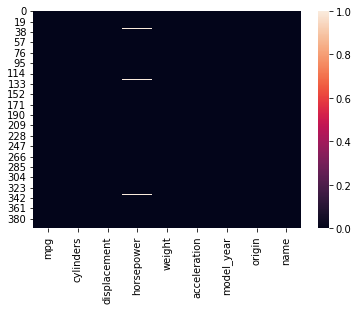

In [ ]:
df = sns.load_dataset('mpg')
shuffled_df = shuffle(df)

print(sns.heatmap(df.isnull()))

df = shuffled_df.copy()
df = df.drop("origin", axis='columns') #non numerical
df = df.drop("name", axis='columns') # non numerical
df = df.dropna() 

In [ ]:
all_x0 = df[["cylinders","displacement","horsepower","weight","acceleration","model_year"]].to_numpy()
all_y0 = df["mpg"].to_numpy()

x_trval0, x_te0, y_trval0, y_te0 = train_test_split(all_x0,all_y0,test_size=0.17,random_state=30)
x_tr0, x_val0, y_tr0, y_val0 = train_test_split(x_trval0,y_trval0,test_size=0.23,random_state=30)

###2) Train model
- Define model and train it.
- Evaluate on train and dev sets.
- Plot the true y values vs the model's predicted values to visualize model performance.

Train R^2 =  0.8124775557442379
Train RMSE =  3.2458888832015402

Val R^2 =  0.793817393716344
Val RMSE =  3.6924102654014748 




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


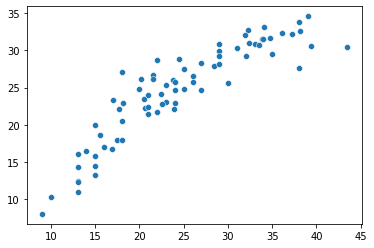

In [ ]:
h = linear_model.LinearRegression()

h.fit(x_tr0,y_tr0)

print("Train R^2 = ", h.score(x_tr0, y_tr0))
pred_tr0 = h.predict(x_tr0)
print("Train RMSE = ", mean_squared_error(y_tr0, pred_tr0, squared=False))

print("\nVal R^2 = ",h.score(x_val0,y_val0))
pred_val0 = h.predict(x_val0)
print("Val RMSE = ", mean_squared_error(y_val0, pred_val0, squared=False),"\n\n")

sns.scatterplot(y_val0,pred_val0)

###3) Trying out tricks

- Feature choise:

First test: displacement, horsepower, acceleration, model_year
    
    - Train R^2 =  0.7566386100079956
    - Train RMSE =  3.9209819243950985
    - Val R^2 =  0.6810048595365608
    - Val RMSE =  3.98251060855267

Second test: horsepower, acceleration, weight

    - Train R^2 =  0.7130286649456272
    - Train RMSE =  4.257829441793051
    - Val R^2 =  0.6453748801241072
    - Val RMSE =  4.199036556506523

Third test: model_year, weight, acceleration, horsepower, cylinders

    - Train R^2 =  0.8082093178275155
    - Train RMSE =  3.480829520794998
    - Val R^2 =  0.7550025743481451
    - Val RMSE =  3.490162663419571

Fourth test: model_year, displacement

    - Train R^2 =  0.7396550732488286
    - Train RMSE =  4.05549211335316
    - Val R^2 =  0.6704228009309352
    - Val RMSE =  4.048027806333866

Final thoughts: After multiple experiments trying different combinations of columns, I've concluded that "model_year" is the most important column when trying to predict "mpg." The difference in the regression metrics and the scatterplot was the most dramatic when this attribute was present vs not-present. I have also concluded that the inclusion of all columns trains the model better than excluding any of them.

In [ ]:
all_x1 = df[["displacement","model_year"]].to_numpy() #modified this line for each "test" explained above
all_y1 = df["mpg"].to_numpy()

x_trval1, x_te1, y_trval1, y_te1 = train_test_split(all_x1,all_y1,test_size=0.17,random_state=30)
x_tr1, x_val1, y_tr1, y_val1 = train_test_split(x_trval1,y_trval1,test_size=0.23,random_state=30)

h = linear_model.LinearRegression()

h.fit(x_tr1,y_tr1)

print("for testing: Train R^2 = ", h.score(x_tr1, y_tr1))
pred_tr1 = h.predict(x_tr1)
print("for testing: Train RMSE = ", mean_squared_error(y_tr1, pred_tr1, squared=False))

print("\nfor testing: Val R^2 = ",h.score(x_val1,y_val1))
pred_val1 = h.predict(x_val1)
print("for testing: Val RMSE = ", mean_squared_error(y_val1, pred_val1, squared=False))
print("\n\n")
#sns.scatterplot(y_val1,pred_val1)

##----------------------------------------------------------------------------------------------------------------------------------------

- Categorical Features
  - Ordinal Encoder - This actually made the model performance a little bit better which I was not expecting. For example, on the dev set evaluation it went from $R^2 = 0.71$ and $RMSE = 3.79$, to $R^2 = 0.82$ and $RMSE = 3.35$

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

df2 = shuffled_df.copy()

# Ordinal Encoder
enc = OrdinalEncoder()
enc.fit(df2[["origin","name"]])
df2[["origin","name"]] = enc.transform(df2[["origin","name"]])

df2 = df2.dropna()

all_x2 = df2[["cylinders","displacement","horsepower","weight","acceleration","model_year","origin","name"]].to_numpy()
all_y2 = df2["mpg"].to_numpy()

x_trval2, x_te2, y_trval2, y_te2 = train_test_split(all_x2,all_y2,test_size=0.17,random_state=30)
x_tr2, x_val2, y_tr2, y_val2 = train_test_split(x_trval2,y_trval2,test_size=0.23,random_state=30)

h = linear_model.LinearRegression()

h.fit(x_tr2,y_tr2)

print("with OrdinalEncoder: Train R^2 = ", h.score(x_tr2, y_tr2))
pred_tr2 = h.predict(x_tr2)
print("with OrdinalEncoder: Train RMSE = ", mean_squared_error(y_tr2, pred_tr2, squared=False))

print("\nwith OrdinalEncoder: Val R^2 = ",h.score(x_val2,y_val2))
pred_val2 = h.predict(x_val2)
print("with OrdinalEncoder: Val RMSE = ", mean_squared_error(y_val2, pred_val2, squared=False))
print("\n\n")
#sns.scatterplot(y_val2,pred_val2)

##----------------------------------------------------------------------------------------------------------------------------------------

- Data Scaling
  - Robust and Standard scaling gave the same regression metrics so I chose to leave standard scaler uncommented since our dataset does not contain enough outliers to require robust.
  - I also noticed that the regression metrics are a little better including the standard scaling so I will include this in my model.

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

df3 = shuffled_df.copy()

#scaler = RobustScaler()   # RobustScaler: dev R^2=0.82 RMSE=3.35
scaler = StandardScaler()  # StandardScaler: dev R^2=0.82, RMSE=3.35

data = df3[["cylinders","displacement","horsepower","weight","acceleration","model_year"]]
scaler.fit(data)
df3[["cylinders","displacement","horsepower","weight","acceleration","model_year"]] = scaler.transform(data)

df3 = df3.dropna()

all_x3 = df3[["cylinders","displacement","horsepower","weight","acceleration","model_year"]].to_numpy()
all_y3 = df3["mpg"].to_numpy()

x_trval3, x_te3, y_trval3, y_te3 = train_test_split(all_x3,all_y3,test_size=0.17,random_state=30)
x_tr3, x_val3, y_tr3, y_val3 = train_test_split(x_trval3,y_trval3,test_size=0.23,random_state=30)

h = linear_model.LinearRegression()

h.fit(x_tr3,y_tr3)

print("with data scaling: Train R^2 = ", h.score(x_tr3, y_tr3))
pred_tr3 = h.predict(x_tr3)
print("with data scaling: Train RMSE = ", mean_squared_error(y_tr3, pred_tr3, squared=False))

print("\nwith data scaling: Val R^2 = ",h.score(x_val3,y_val3))
pred_val3 = h.predict(x_val3)
print("with data scaling: Val RMSE = ", mean_squared_error(y_val3, pred_val3, squared=False))
print("\n\n")
#sns.scatterplot(y_val3,pred_val3)

###4) Putting it all together - Official final model:
includes:
- handling (dropping) duplicate rows
- handling (dropping) missing values
- handling (dropping) outliers
- shuffling the data
- ordinal encoder
- standard scalar
- splitting data into train, val, and test sets
- evaluating on trian and val with $R^2$ and RMSE


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

mpg_df = sns.load_dataset('mpg')

mpg_df.drop_duplicates(inplace=True)

mpg_df = shuffle(mpg_df)

numerical_cols = mpg_df[["cylinders","displacement","horsepower","weight","acceleration","model_year"]]

scaler = StandardScaler()
scaler.fit(numerical_cols)
mpg_df[["cylinders","displacement","horsepower","weight","acceleration","model_year"]] = scaler.transform(numerical_cols)

enc = OrdinalEncoder()
enc.fit(mpg_df[["origin","name"]])
mpg_df[["origin","name"]] = enc.transform(mpg_df[["origin","name"]])

mpg_df = mpg_df.dropna()

#zscore for handling outliers and for Part 2
z_score = stats.zscore(mpg_df)
z_df = mpg_df[(np.abs(z_score) < 3).all(axis=1)]
mpg_df = z_df

all_x = mpg_df[["cylinders","displacement","horsepower","weight","acceleration","model_year","origin","name"]].to_numpy()
all_y = mpg_df["mpg"].to_numpy()

x_trval, x_te, y_trval, y_te = train_test_split(all_x,all_y,test_size=0.17,random_state=30)
x_tr, x_val, y_tr, y_val = train_test_split(x_trval,y_trval,test_size=0.23,random_state=30)
#print(x_tr.shape) #(250, 8)
#print(x_val.shape) #(75, 8)
#print(x_te.shape) #(67, 8)
#print(y_tr.shape) #(250,)
#print(y_val.shape) #(75,)
#print(y_te.shape) #(67,)

h = linear_model.LinearRegression()

h.fit(x_tr,y_tr)

print("Train R^2 = ", h.score(x_tr, y_tr))
pred_tr = h.predict(x_tr)
print("Train RMSE = ", mean_squared_error(y_tr, pred_tr, squared=False))

print("Val R^2 = ",h.score(x_val,y_val))
pred_val = h.predict(x_val)
print("Val RMSE = ", mean_squared_error(y_val, pred_val, squared=False),"\n\n")

Train R^2 =  0.8119307950584509
Train RMSE =  3.3923629955174603
Val R^2 =  0.8446397344250156
Val RMSE =  2.9322867391441148 




#Part II: 

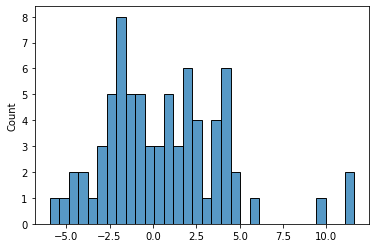

In [ ]:
# Calculate the residuals: (y − h(x) ) 
diff = y_val - pred_val
sns.histplot(data=diff,bins=32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


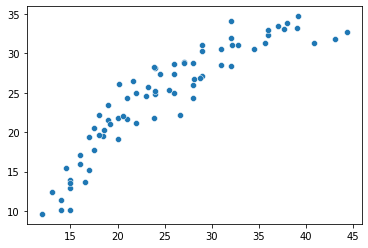

In [ ]:
# Scatterplot predictions (y-axis) vs ground-truth values (x-axis)
sns.scatterplot(y_val,pred_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


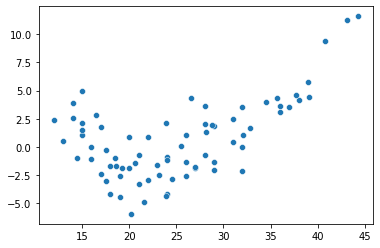

In [ ]:
# Homoscedasticity: residuals (y-axis) vs the ground-truth value (x-axis)
sns.scatterplot(y_val,diff)

In [ ]:
# Interpret the coefficients
coefficients = h.coef_
print(coefficients)

[-5.92262602e-01  7.12851454e-01 -1.23276136e+00 -4.43343283e+00
 -4.04662968e-01  2.60348549e+00 -7.00687812e-01  1.28286825e-03]


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

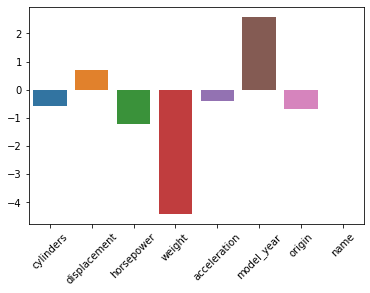

In [ ]:
# Plot the coefficients
names = mpg_df.columns[1:9]
sns.barplot(x=names,y=coefficients)
plt.xticks(rotation = 45)

The coefficient that was most important to the model was that associated with "model_year," which does make intuitive sense because I discovered and stated this earlier in my notebook!

Next was "displacement," and the one that was least important to the model was "weight," which also makes sense because I discovered these earlier as well during my "Feature Choice" exploration.

# ------- RUNNING ON TEST SET:

TEST R^2 =  0.807048121063193

TEST RMSE =  3.322123711675277 




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


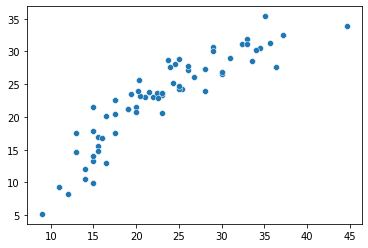

In [ ]:
print("TEST R^2 = ", h.score(x_te, y_te))
pred_te = h.predict(x_te)

print("\nTEST RMSE = ", mean_squared_error(y_te, pred_te, squared=False),"\n\n")

sns.scatterplot(y_te,pred_te)